# Project Numerical Analysis: 'Beams and Frameworks of Beams'

## Dependencies

In [1]:
from meshes import *
from NumericalSolutions import *
from AnalyticalSolutions import *

import matplotlib.pyplot as plt
import numpy as np


"""
For the widgets to show up, do the following in the anaconda prompt:

conda install -c conda-forge ipywidgets
jupyter labextension install @jupyter-widgets/jupyterlab-manager
"""
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual


## Generate Mesh

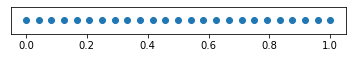

In [2]:
# Spatial resolution of mesh
N = 25

# Right limit of mesh
L = 1

# Generate 1D mesh
[nodes, elems, faces] = get_mesh_1D(N, [0,L], True);

## Helper Functions

In [3]:
def get_both(E=1,I=1,q=0,QL=0,M0=0,ML=0,a=0,b=0,a0=0,aL=0,two_sided_support=False):
    
    if two_sided_support:
        
        # Do analytical solution
        sol_ana = AnalyticalSolutionBothEnds(a0=a0, M0=M0, aL=aL, ML=ML, case="constant", c=q, E=E, I=I, L=L)
        w_ana, wp_ana = sol_ana.solve()
        
        # Do numerical solution
        sol_num = NumericalSolutionBothEnds(ML=ML, M0=M0, a0=a0, aL=aL, E=E, I=I, N=N, L=L, q=q)
        w_num, wp_num = sol_num.solve()

    else:
        
        # Do analytical solution
        sol_ana = AnalyticalSolutionCantilever(a=a, b=b, QL=QL, ML=ML, case="constant", E=E, I=I, c=q, L=L)
        w_ana, wp_ana = sol_ana.solve()
        
        # Do numerical solution
        sol_num = NumericalSolutionCantilever(a=a, b=b, QL=QL, ML=ML, E=E, I=I, N=N, L=L, q=q)
        w_num, wp_num = sol_num.solve()
        
    return w_ana, wp_ana, w_num, wp_num

## W vs QL

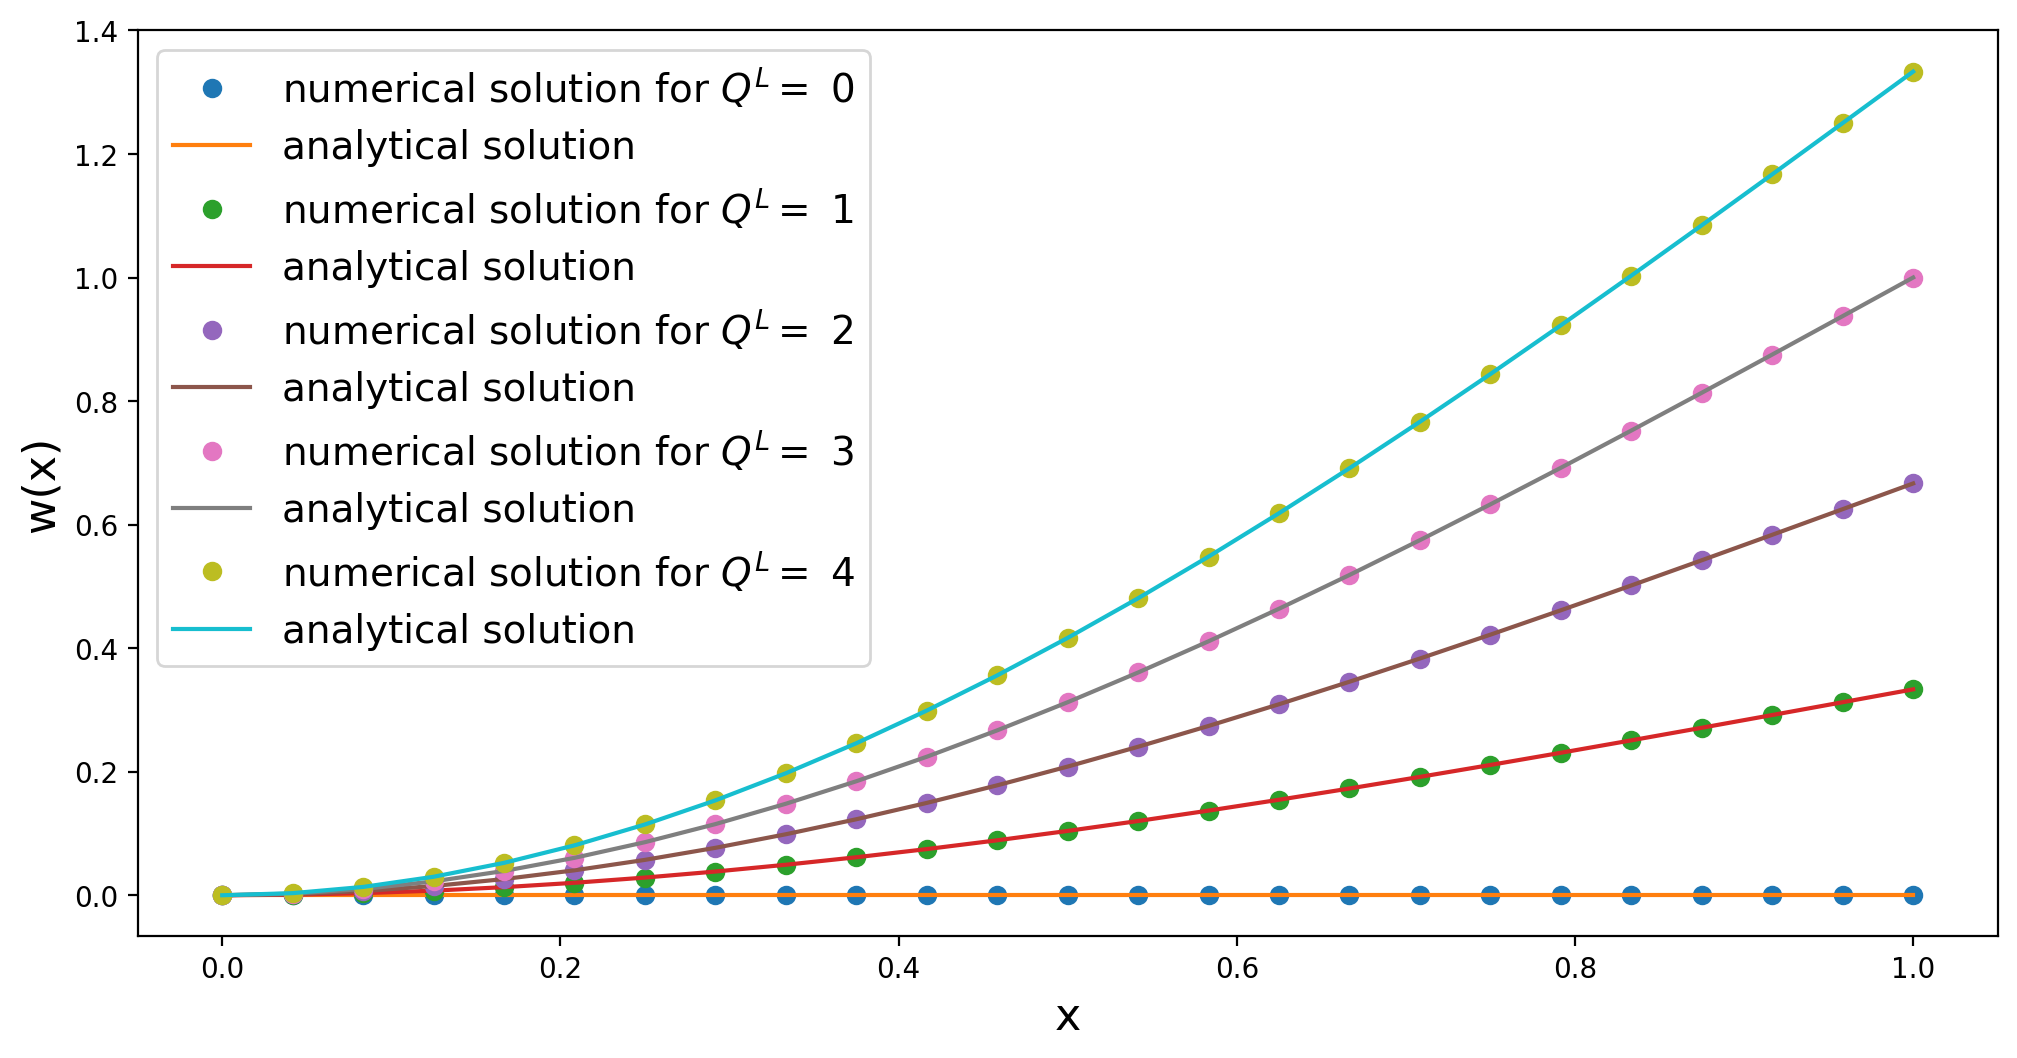

In [4]:
QLlist = range(5)
plt.figure(figsize=(12, 6), dpi=200)

for Q in QLlist:    
    w_ana, wp_ana, w_num, wp_num = get_both(QL=Q)
    
    plt.plot(nodes,w_num,'o',label=r'numerical solution for $Q^L=$ %i' % Q)
    plt.plot(nodes,w_ana(nodes),label='analytical solution')
    plt.legend(prop={'size': 14})
    plt.ylabel("w(x)",size=16)
    plt.xlabel("x",size=16)

## W' vs QL

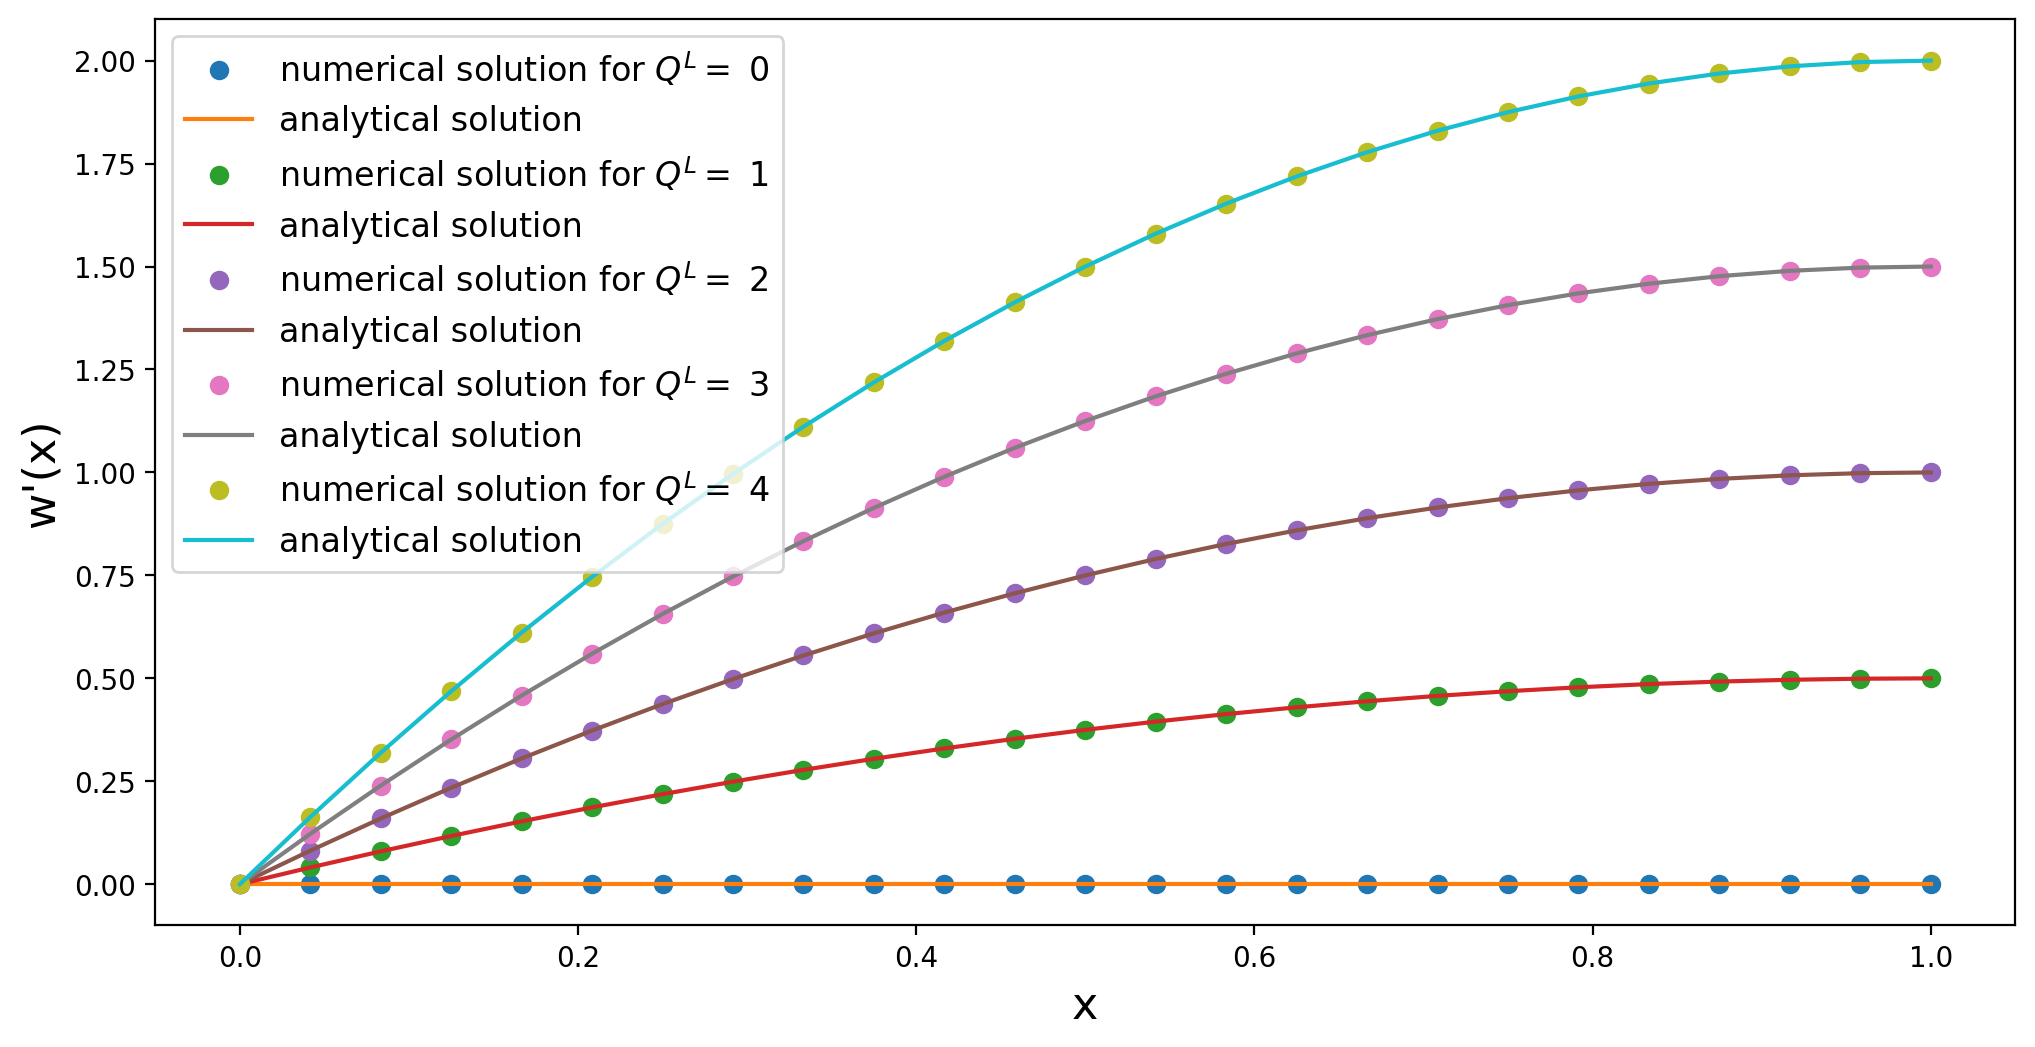

In [5]:
QLlist = range(5)
plt.figure(figsize=(12, 6), dpi=200)

for Q in QLlist:    
    w_ana, wp_ana, w_num, wp_num = get_both(QL=Q)
    
    plt.plot(nodes,wp_num,'o',label=r'numerical solution for $Q^L=$ %i' % Q)
    plt.plot(nodes,wp_ana(nodes), label='analytical solution')
    plt.legend(prop={'size': 12})
    plt.ylabel("w'(x)",size=16)
    plt.xlabel("x",size=16)

## W vs q

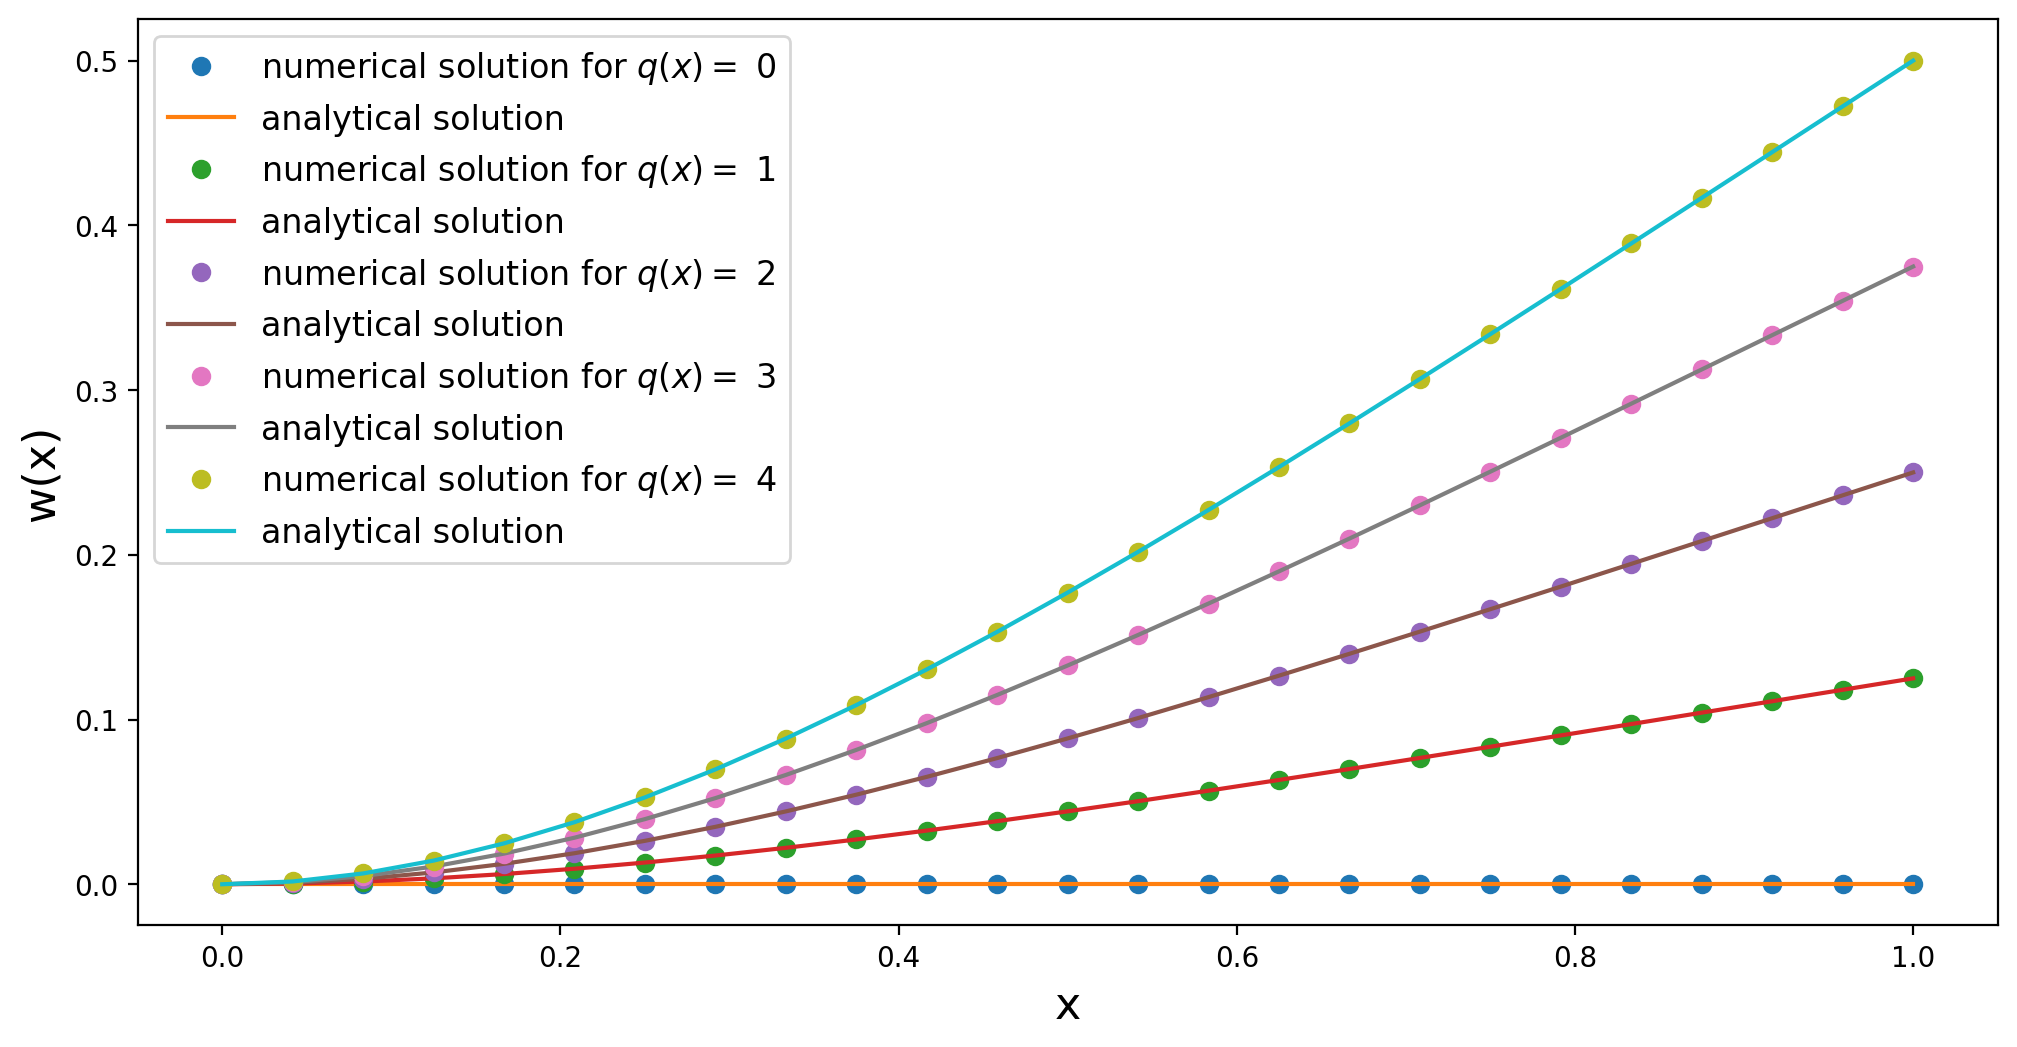

In [6]:
qlist = range(5)
plt.figure(figsize=(12, 6), dpi=200)

for q in qlist:    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q)
    
    plt.plot(nodes,w_num,'o',label=r'numerical solution for $q(x)=$ %i' % q)
    plt.plot(nodes,w_ana(nodes),label='analytical solution')
    plt.legend(prop={'size': 12})
    plt.ylabel("w(x)",size=16)
    plt.xlabel("x",size=16)

## W' vs q

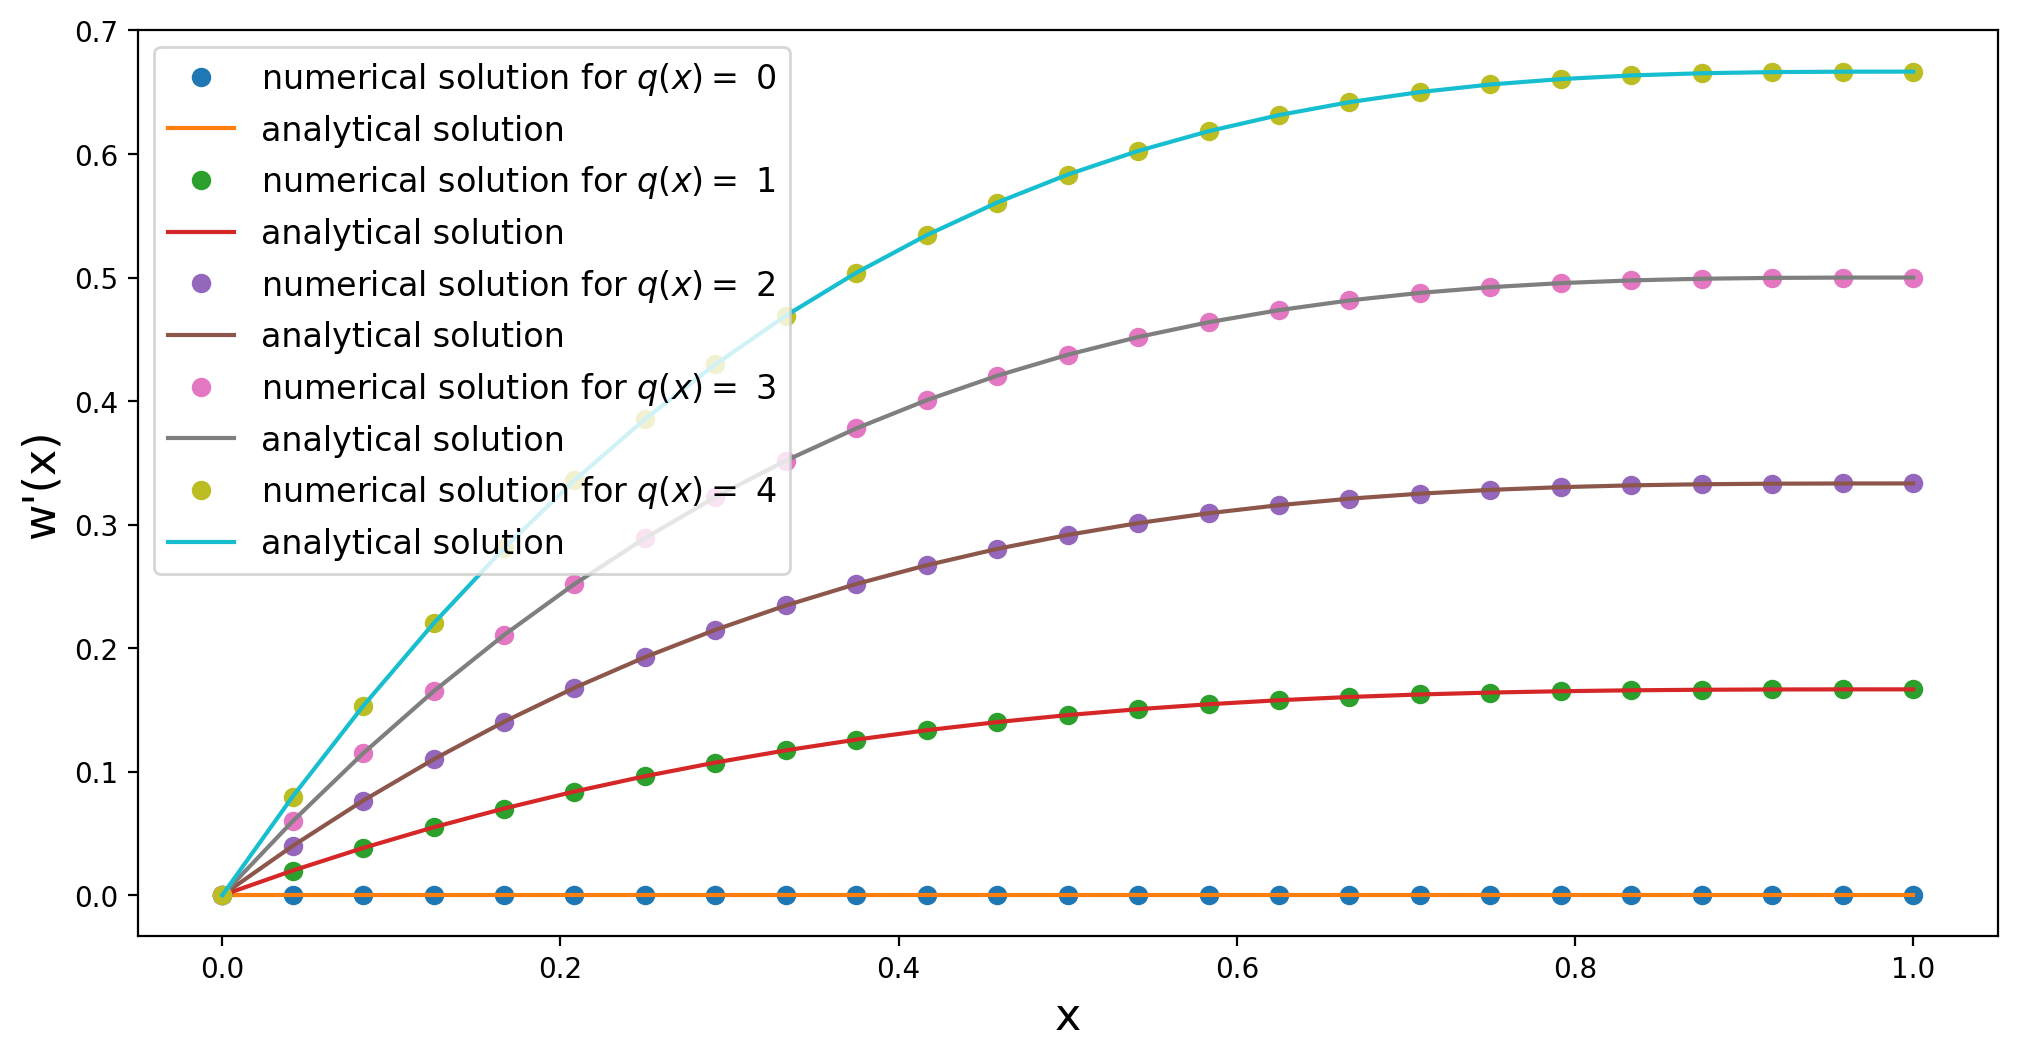

In [7]:
qlist = range(5)
plt.figure(figsize=(12, 6), dpi=200)

for q in qlist:    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q)
    
    plt.plot(nodes,wp_num,'o',label=r'numerical solution for $q(x)=$ %i' % q)
    plt.plot(nodes,wp_ana(nodes),label='analytical solution')
    plt.legend(prop={'size': 12})
    plt.ylabel("w'(x)",size=16)
    plt.xlabel("x",size=16)

## W vs q, Supported at Both Ends

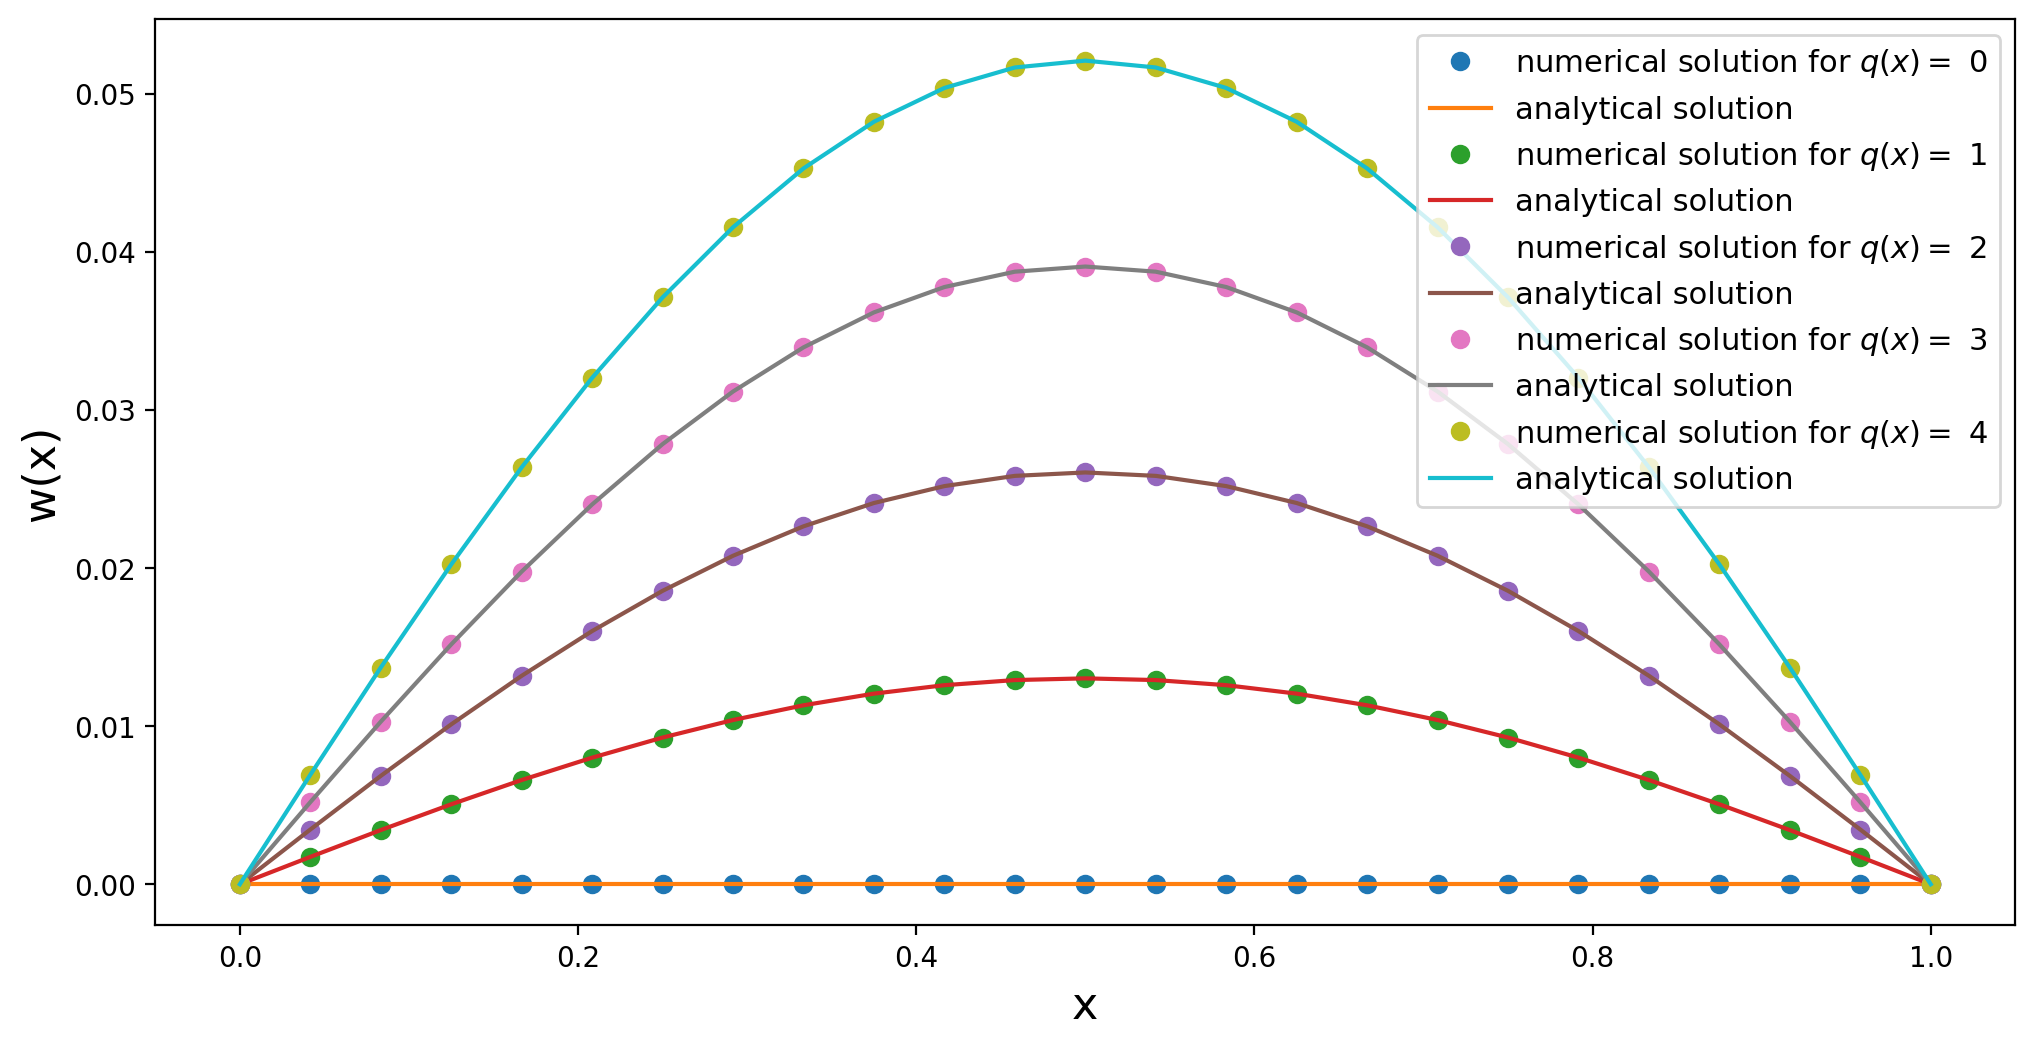

In [8]:
qlist = range(5)
plt.figure(figsize=(12, 6), dpi=200)

for q in qlist:    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q, two_sided_support=True)
    
    plt.plot(nodes,w_num,'o',label=r'numerical solution for $q(x)=$ %i' % q)
    plt.plot(nodes,w_ana(nodes),label='analytical solution')
    plt.legend(prop={'size': 11})
    plt.ylabel("w(x)",size=16)
    plt.xlabel("x",size=16)

## W' vs q, Supported at Both Ends

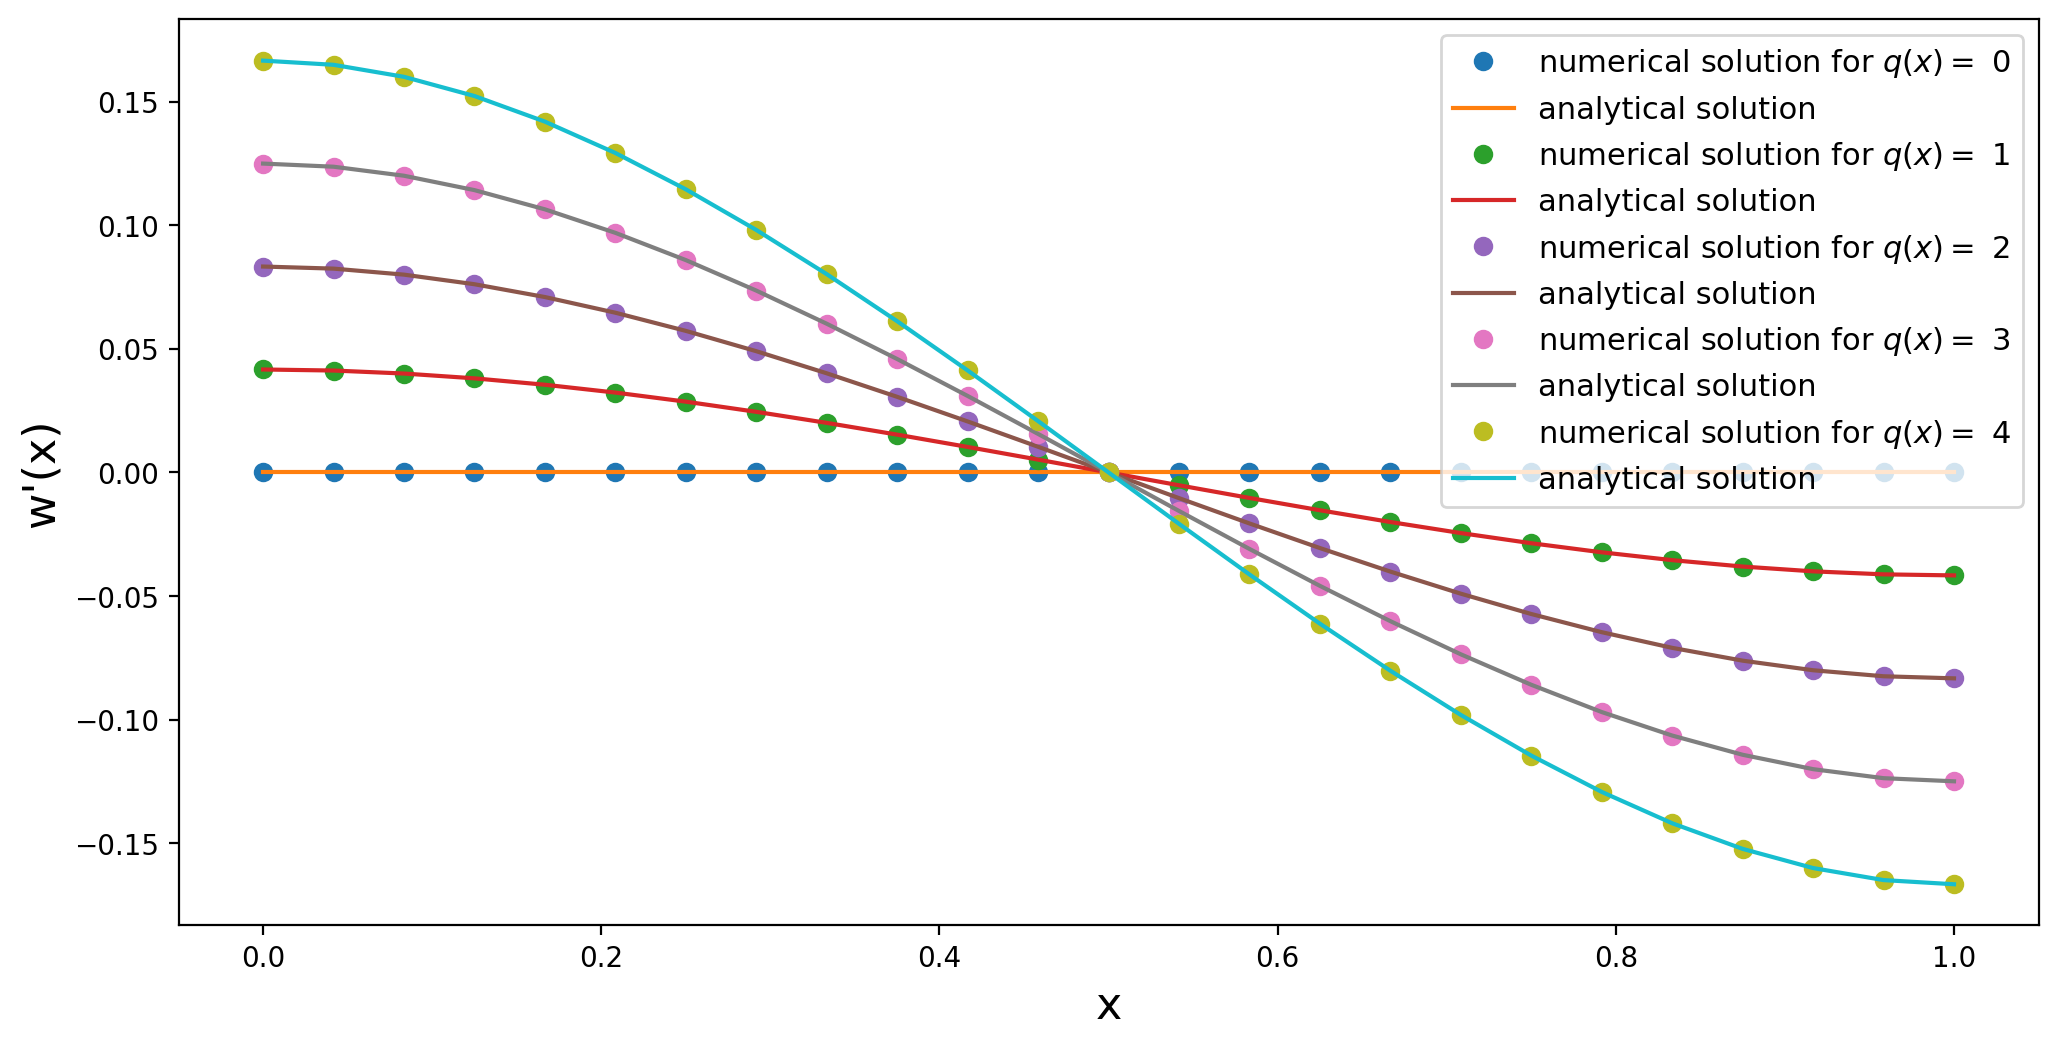

In [9]:
qlist = range(5)
plt.figure(figsize=(12, 6), dpi=200)

for q in qlist:    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q, two_sided_support=True)
    
    plt.plot(nodes,wp_num,'o',label=r'numerical solution for $q(x)=$ %i' % q)
    plt.plot(nodes,wp_ana(nodes),label='analytical solution')
    plt.legend(prop={'size': 11})
    plt.ylabel("w'(x)",size=16)
    plt.xlabel("x",size=16)

## Interactive Analytical Solution Plots
### Supported on One End

In [10]:
x = np.linspace(0,L,N)

def f(a, b, QL, ML, x0, Load, LoadConstant):
    sol_ana = AnalyticalSolutionCantilever(a=a, b=b, QL=QL, ML=ML, x0=x0, case=Load, L=L, c=LoadConstant, q=lambda x:x)
    w_ana,_ = sol_ana.solve()
    plt.plot(x, w_ana(x))

interact(f, a=(-20.0,20.0), b=(-5.0,5.0), QL=(-2.0,2.0), ML=(-2.0,2.0), x0=(0.0, 5.0), Load=["constant", "delta", "arbitrary function"], LoadConstant = (-15.0,15.0))
plt.show()

interactive(children=(FloatSlider(value=0.0, description='a', max=20.0, min=-20.0), FloatSlider(value=0.0, des…

### Supported on Both Ends

In [11]:
x = np.linspace(0,L,N)

def g(A1, B1, A2, B2, x0, Load, LoadConstant):
    sol_ana = AnalyticalSolutionBothEnds(a0=A1, aL=B1, M0=A2, ML=B2, x0=x0, case=Load, L=L, c=LoadConstant, q=lambda x:x)
    w_ana,_ =  sol_ana.solve()
    plt.plot(x, w_ana(x))

interact(g, A1=(-20.0,20.0), B1=(-20.0,20.0), A2=(-20.0,20.0), B2=(-20.0,20.0), x0=(0.0, 5.0), Load=["constant", "delta", "arbitrary function"], LoadConstant = (-15.0,15.0))
plt.show()

interactive(children=(FloatSlider(value=0.0, description='A1', max=20.0, min=-20.0), FloatSlider(value=0.0, de…